## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/datasets/_openml.py:109: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/data_version/1. Retrying...
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/datasets/_openml.py:109: UserWarning: A network error occurred while downloading https://api.openml.org/api/v1/json/data/554. Retrying...
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/datasets/_openml.py:109: UserWarning: A network error occurred while downloading https://api.openml.org/data/v1/download/52667/mnist_784.arff. Retrying...
  warn(


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

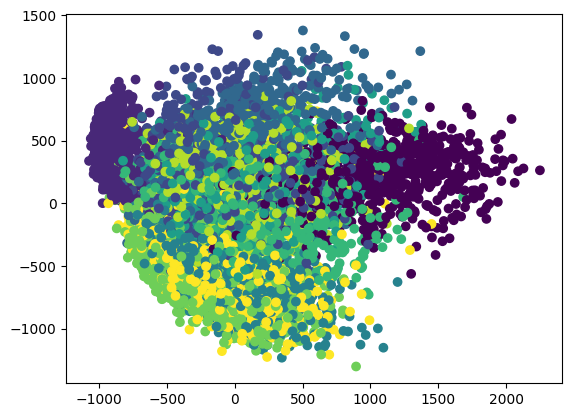

In [9]:
# Your code here
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

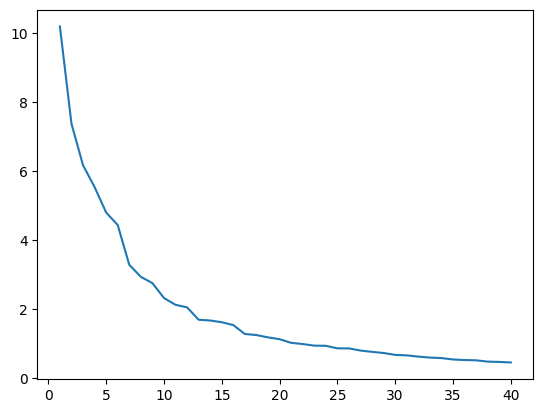

In [13]:
# Your code here
pca = PCA()
pca.fit(X)

var_explained = pca.explained_variance_ratio_ * 100 

plt.plot(range(1, 41), var_explained[:40])

#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [18]:
# Your code here
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(n_components_95)

149


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

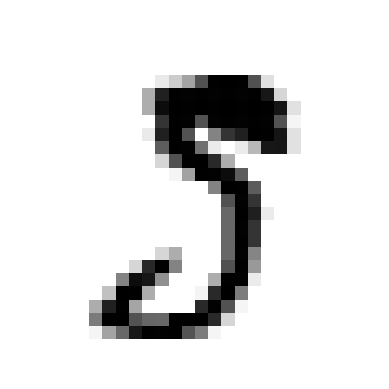

In [22]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

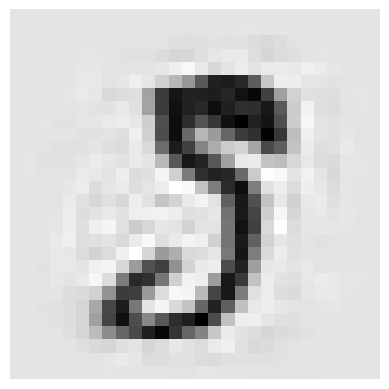

In [23]:
# Your code here

pca_95 = PCA(n_components=n_components_95)
X_mnist_train_pca = pca_95.fit_transform(X_mnist_train)

digit_reconstructed = pca_95.inverse_transform(X_mnist_train_pca[0])

plot_mnist_digit(digit_reconstructed)


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [24]:
# Your code here
pca_80 = PCA(n_components=0.80)
X_mnist_train_pca80 = pca_80.fit_transform(X_mnist_train)
X_mnist_test_pca80  = pca_80.transform(X_mnist_test)

print(pca_80.n_components_)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_mnist_train, y_mnist_train)
y_pred_raw = knn.predict(X_mnist_test)
acc_raw = accuracy_score(y_mnist_test, y_pred_raw)
print(acc_raw)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_mnist_train_pca80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_mnist_test_pca80)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)
print(acc_pca)

42
0.9428571428571428
0.9457142857142857


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

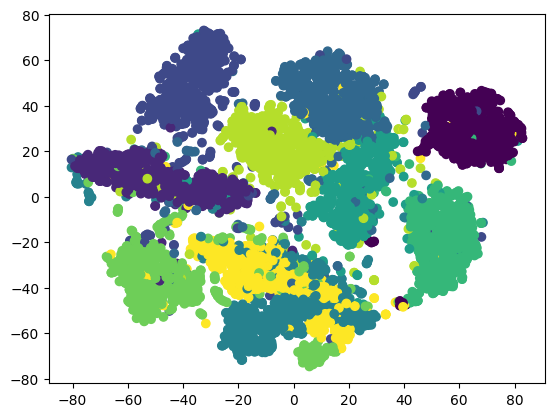

In [26]:
# Your code here
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [30]:
# Your code here
X_train_tsne = tsne.fit_transform(X_mnist_train)
X_test_tsne = tsne.fit_transform(X_mnist_test)

knn_tsne = KNeighborsClassifier(n_neighbors=3)
knn_tsne.fit(X_train_tsne, y_mnist_train)
y_pred_tsne = knn_tsne.predict(X_test_tsne)
acc_tsne = accuracy_score(y_mnist_test, y_pred_tsne)
print(acc_tsne)

0.405


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [31]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

# %pip install numpy==2.0
# %pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 49.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.7 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [umap-learn]5 [pynndescent]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip instal

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


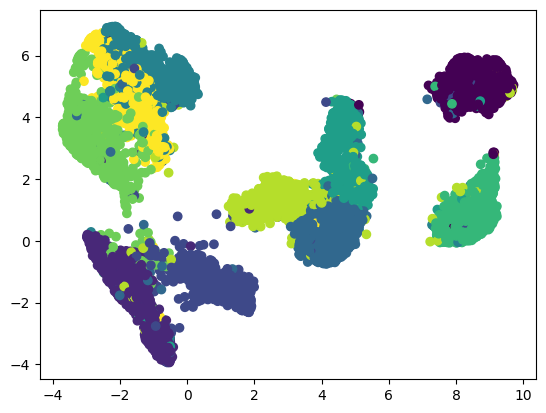

In [32]:
# Your code here
import umap
umap_2d = umap.UMAP(n_components=2, n_neighbors=15)
X_umap_2d = umap_2d.fit_transform(X)
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y)

Now, calculate accuracy with KNN.

In [33]:
# Your code here
umap_feats = umap.UMAP(n_components=50, n_neighbors=15)
X_train_umap = umap_feats.fit_transform(X_mnist_train)
X_test_umap  = umap_feats.transform(X_mnist_test)
# I should've made this by a function by now, haha
knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_train_umap, y_mnist_train)
y_pred_umap = knn_umap.predict(X_test_umap)
acc_umap = accuracy_score(y_mnist_test, y_pred_umap)
print(acc_umap)

0.905


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.814


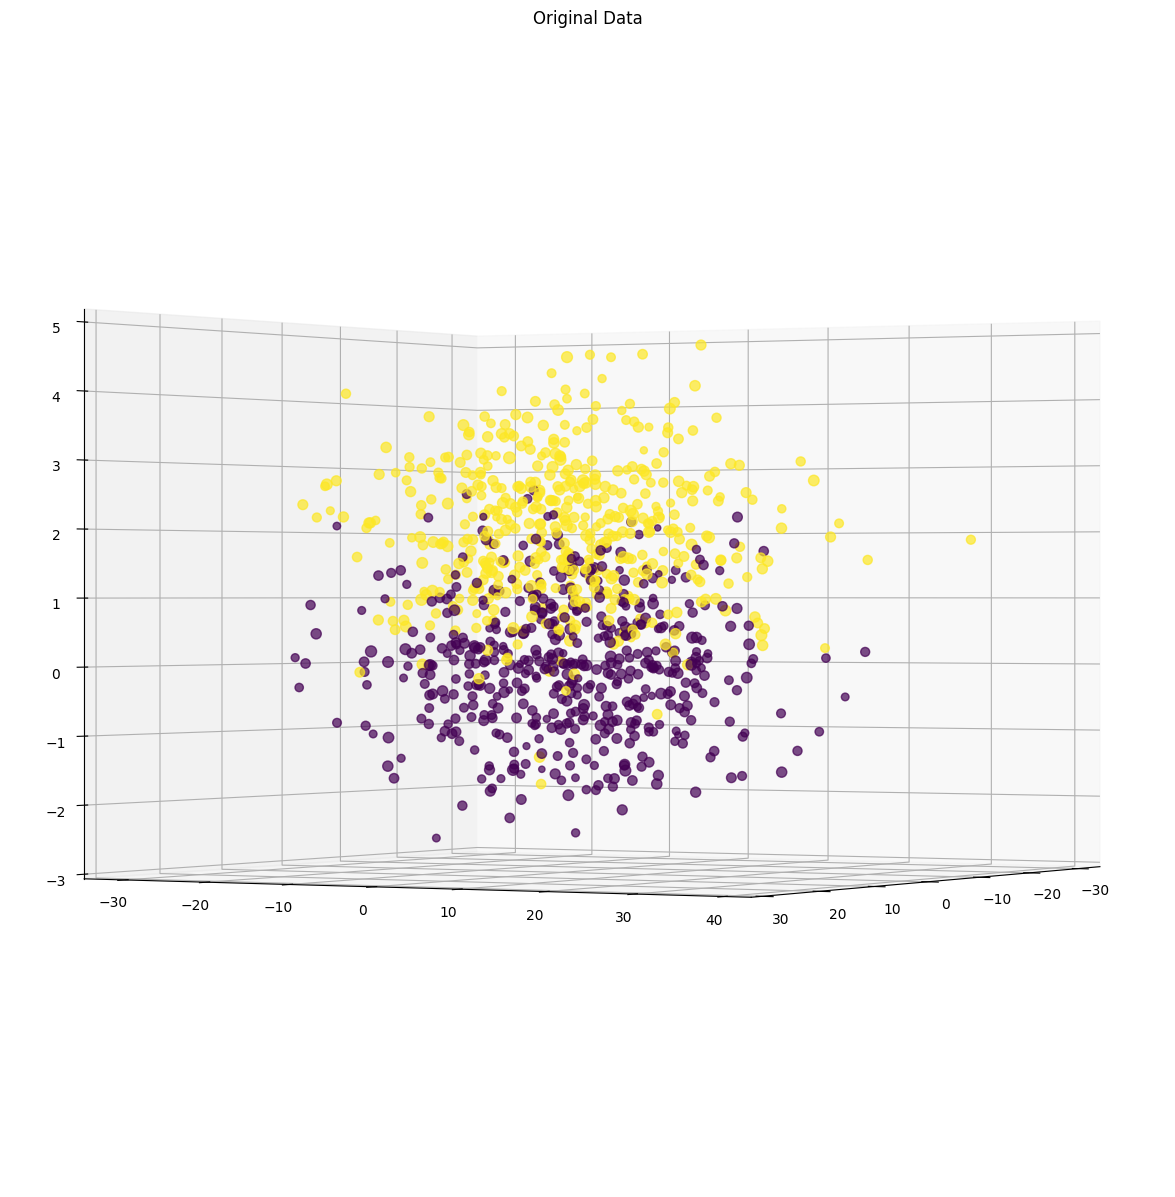

In [47]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
w0 = np.random.normal(loc=0, scale=5, size=n_points)
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
w1 = np.random.normal(loc=3, scale=5, size=n_points)
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)), np.hstack((w0, w1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))

# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

# ChatGPT: Normalize 4th dimension so sizes don’t get too extreme
sizes = 20 + 50 * (X[:, 3] - X[:, 3].min()) / np.ptp(X[:, 3])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=sizes, alpha=0.7)
ax.set_title('Original Data')

plt.show()


In [48]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.75


1. Try with PCA

In [49]:
# Your code here
pca_2 = PCA(n_components=4)
X_train_pca2 = pca_2.fit_transform(X_train)
X_test_pca2 = pca_2.transform(X_test)

knn_pca2 = KNeighborsClassifier(n_neighbors=4)
knn_pca2.fit(X_train_pca2, y_train)
y_pred_pca2 = knn_pca2.predict(X_test_pca2)
acc_pca2 = accuracy_score(y_test, y_pred_pca2)
print(acc_pca2)

0.695


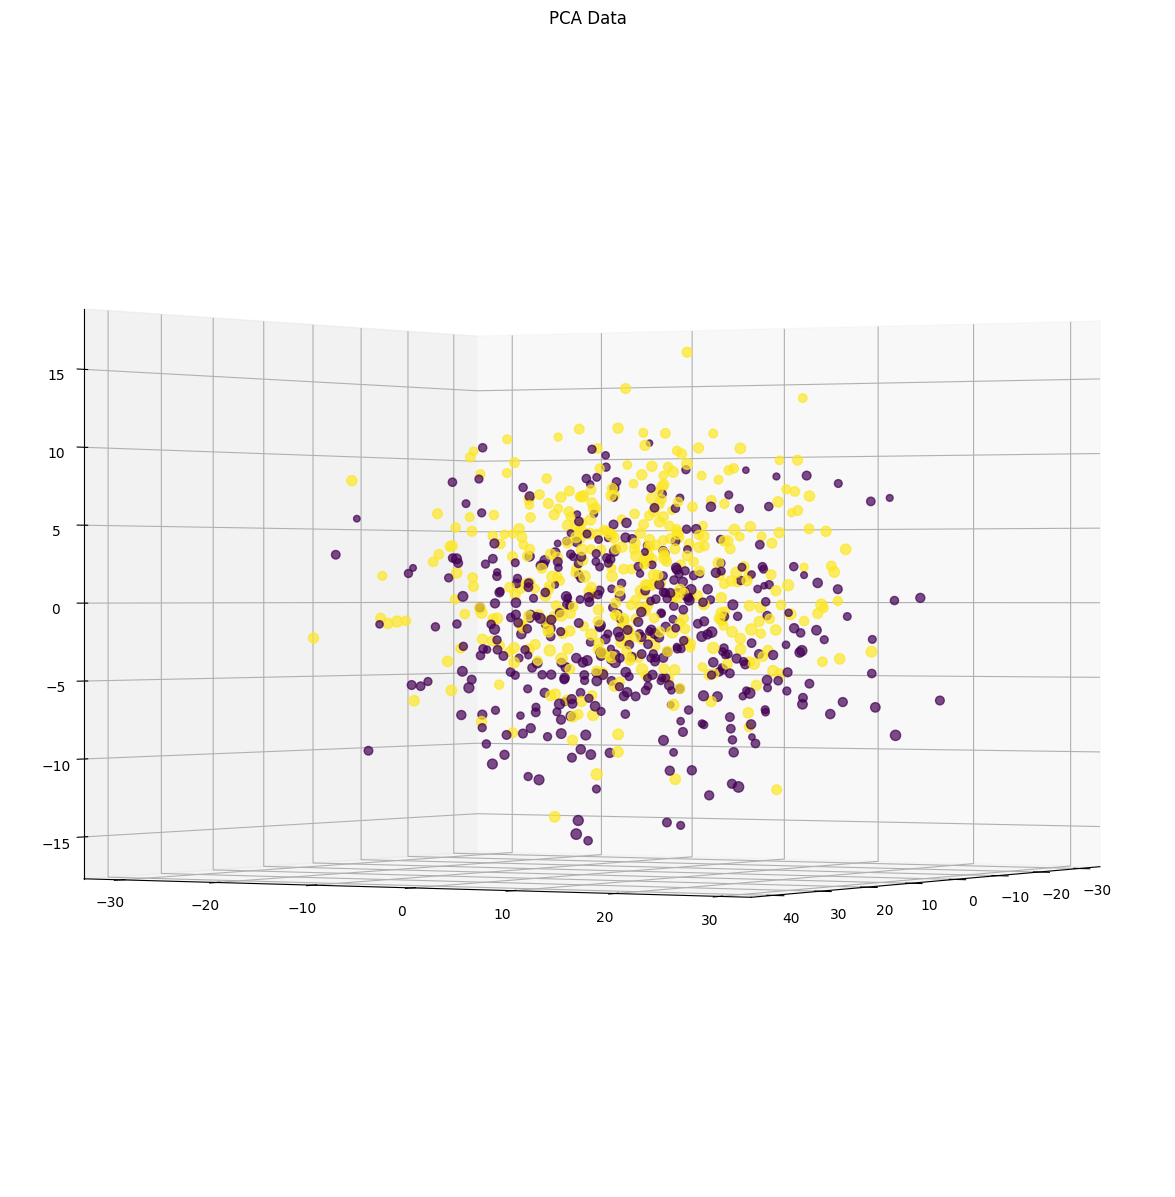

In [50]:
# Your code here
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

X_pca_vis2 = X_train_pca2[:, :3]

pca_sizes = 20 + 50 * (X_train_pca2[:, 3] - X_train_pca2[:, 3].min()) / np.ptp(X_train_pca2[:, 3])

ax.scatter(X_pca_vis2[:, 0], X_pca_vis2[:, 1], X_pca_vis2[:, 2], c=y_train, cmap='viridis', s=pca_sizes, alpha=0.7)
ax.set_title('PCA Data')

plt.show()

2. Try with UMAP.

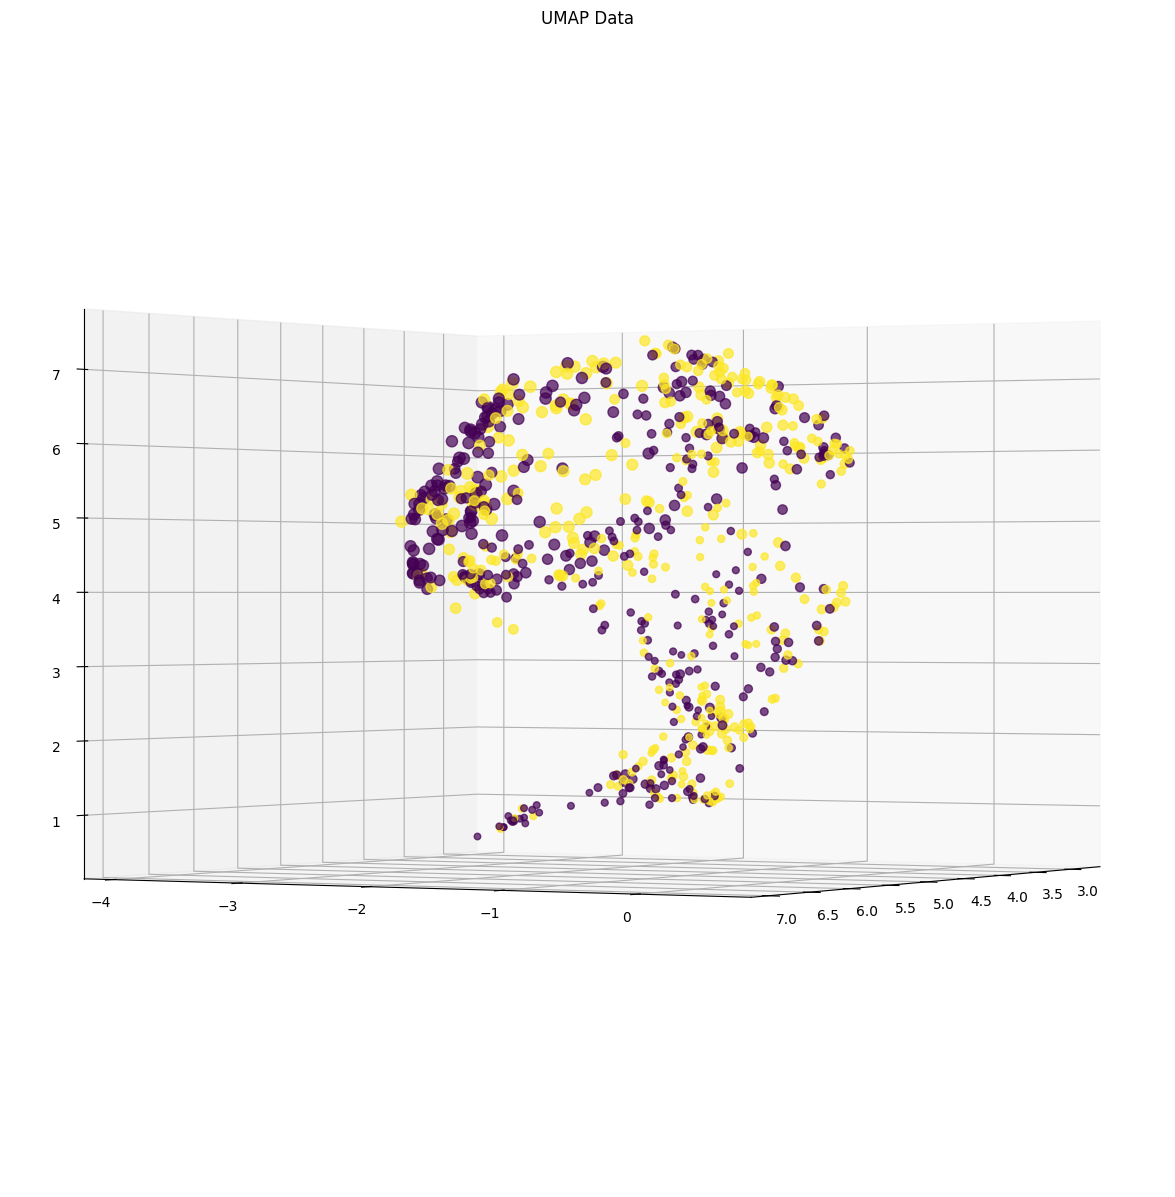

In [53]:
# Your code here
umap_3 = umap.UMAP(n_components=4)
X_train_umap3 = umap_3.fit_transform(X_train)

fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

X_umap_vis = X_train_umap3[:, :3]

umap_sizes = 20 + 50 * (X_train_umap3[:, 3] - X_train_umap3[:, 3].min()) / np.ptp(X_train_umap3[:, 3])

ax.scatter(X_umap_vis[:, 0], X_umap_vis[:, 1], X_umap_vis[:, 2], c=y_train, cmap='viridis', s=umap_sizes, alpha=0.7)
ax.set_title('UMAP Data')

plt.show()

In [54]:
# Your code here
umap3 = umap.UMAP(n_components=50)
X_train_umap3 = umap3.fit_transform(X_train)
X_test_umap3  = umap3.transform(X_test)

knn_umap3 = KNeighborsClassifier(n_neighbors=4)
knn_umap3.fit(X_train_umap3, y_train)

y_pred_umap3 = knn_umap3.predict(X_test_umap3)
acc_umap3 = accuracy_score(y_test, y_pred_umap3)
print(acc_umap3)

0.58


Explain your results in the cell below.  Which works better?  Why?

Based on the plots, it looks as if UMAP is doing significantly worse in 3 dimensions. The accuracy results back this up, with only .585 in 3 dimensions. 

Once we jump to 4D, the UMAP gets this cool crescent shape. The PCA model seemingly struggles but still puts up 69.5% accuracy. This beats out the UMAP model's 58.5% accuracy. 

However, the assumption is that as the dimensions rise, the UMAP's accuracy will appraoch (and potentially pass) the PCA's accuracy.